## Setup Imports and Variables

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

import aip_utils

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Explore the Data

In [2]:
df_train = aip_utils.read_table_from_file("data/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Plot a few features to get a better idea of each:

Text(0.5, 1.0, 'Age Histogram')

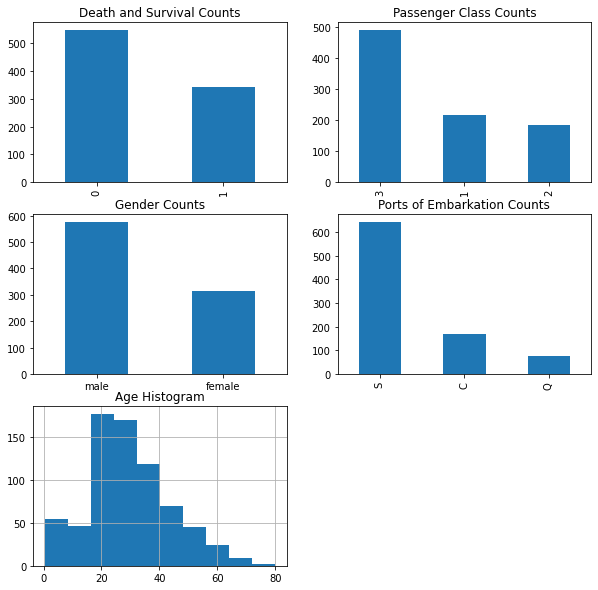

In [4]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

## Data Preparation for Machine Learning

In [5]:
#Transform Sex from a string to a number representation
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
# Transform Embarked from a string to a number representation
df_train['Embarked'] = df_train['Embarked'].astype(str)  
embarked_locs = sorted(df_train['Embarked'].unique())

embarked_locs_mapping = dict(zip(embarked_locs, 
                                 range(0, len(embarked_locs) + 1)))

df_train['Embarked_Val'] = df_train['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)

# Since the vast majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S':
if df_train[df_train['Embarked'].isnull()].size > 0 or df_train[df_train['Embarked'].eq('nan')].size > 0:
    df_train.replace({'Embarked_Val' : 
                   { embarked_locs_mapping['nan'] : embarked_locs_mapping['S'] 
                   }
               }, 
               inplace=True)
    

# Leaving Embarked as integers implies ordering in the values, which does not exist. Another way to represent Embarked without ordering is to create dummy variables:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked_Val'], prefix='Embarked_Val')], axis=1)    
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,0,0,1


In [7]:
# Feature Age

# To keep Age in tact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [8]:
# Feature: Family Size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,0,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0,1,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,0,0,1,35.0,0


In [9]:
# Final Data Preparation for Machine Learning
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], 
                         axis=1)
df_train.dtypes


Survived            int64
Pclass              int64
Fare              float64
Sex_Val             int64
Embarked_Val_0      uint8
Embarked_Val_1      uint8
Embarked_Val_2      uint8
AgeFill           float64
FamilySize          int64
dtype: object

In [10]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  1.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  1.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  1.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  0.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  0.    , 32.    ,  0.    ]])

## Random Forest Training

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

# Fit the model to our training data
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9809203142536476'

## Random Forest Predicting

In [12]:
df_test = aip_utils.read_table_from_file('/data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
# Data wrangle the test set and convert it to a numpy array
import preprocess_data
df_test = preprocess_data.clean_data(df_test, drop_passenger_id=False)
test_data = df_test.values

In [14]:
# Get the test data features, skipping the first column 'PassengerId'
test_x = test_data[:, 1:]
test_y = test_data[:, 0]

# Predict the Survival values for the test data
predict_y = clf.predict(test_x)

## Evaluate Model Accuracy

In [18]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.84


In [20]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.91      0.88       110
    Survived       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

